Import modules that contains all the functions to solve the problems

In [8]:
import modules as m
import netwoekx as nx

ModuleNotFoundError: No module named 'netwoekx'

# Problem 1

The function $\texttt{create}$\_$\texttt{authors}$\_$\texttt{graph}$ works as follow:
- opens the file given as string (input);
- creates the publications' dictionary: for each authors collect the list of his\her publications
- creates the graph based on publications' dictionary using networkx library (the authors that shared the same publication are connected)

In [2]:
authors_graph = m.create_authors_graph('full_dblp.json')

Loading full_dblp.json...
Creating the dictionary of publications...
Creating the authors graph...
Graph created!


The authors graph is defined as follow:
- each node is identified by the author's id;
- each edge is weighted using the formula: 
$w(a_{1},a_{2})= 1- J(p_{1},p_{2}) \text{ where J is defined as: } \frac{|p_1 \cap p_2|}{|p_1 \cup p_2|}$

# Problem 2

First of all we create a dictionary for all the publications: the key is the conference_id and the value is a set of authors id. 

In [4]:
confs_dict = m.create_conferences_dictionary('full_dblp.json')

Loading full_dblp.json...
Creating the dictionary of conferences...
Dictionary created!


The $\texttt{confs}$\_$\texttt{dict}$ is used for building the subgraph: for a given conference id we used its value to identify the authors in the complete $\texttt{authors}$\_$\texttt{graph}$.

In [10]:
subgraph = m.subgraph(authors_graph, confs_dict, 10)

For the visualization we used the $\texttt{visualize}$\_$\texttt{graph}$

/Users/saraspadaccini/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/saraspadaccini/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/saraspadaccini/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/saraspadaccini/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 

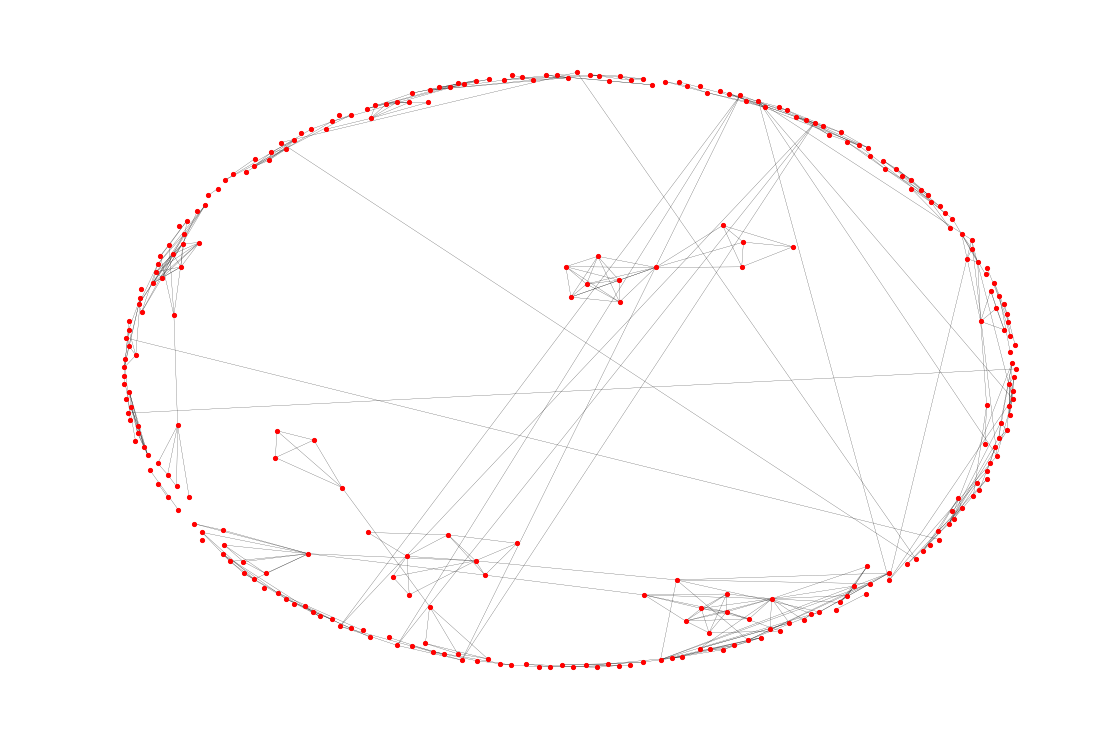

In [11]:
m.visualize_graph(subgraph, node_labels=False, edge_labels=False) 

## Degree 
The node degree is the number of edges adjacent to the node. Degree is simply the number of nodes at distance one.

Using the function $\texttt{get}$\_$\texttt{centralities}$ the degree, betwenness and closness are computed (using networkx library). 

In [17]:
degree, betweenness, closeness=m.get_centralities(subgraph) 

The function $\texttt{visualize}$\_$\texttt{histogram}$ plot the degree values. In the following histogram the x axes represents the degree and the y axes the number of nodes.

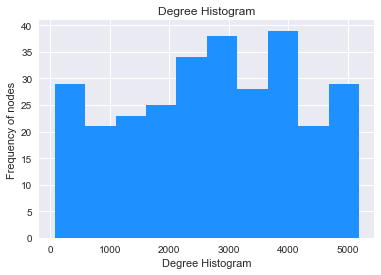

In [18]:
m.visualize_histogram(degree, 'Degree Histogram')

## Betweenness

The betweenness centrality is a measure of centrality in a graph based on shortest paths. Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. The betweenness centrality of a node $v$ is given by the expression:

$g(v)=\sum _{{s\neq v\neq t}}{\frac  {\sigma _{{st}}(v)}{\sigma _{{st}}}}$ where $\sigma_{st}$ is the total number of shortest paths from node $s$ to node $t$ and $\sigma_{st}(v)$ is the number of those paths that pass through $v$.




In the following Betweenness Histogram, the x axes represents the betweenness centrality measure computed used networkx and the y the corresponding number of nodes. Most of the nodes results to have betweenness equal to zero. 

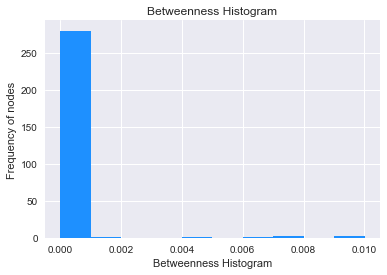

In [19]:
m.visualize_histogram(betweenness, 'Betweenness Histogram')

## Closenesss
The closeness centrality of a node is a measure of centrality in a network, calculated as the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.

Closeness is defined as:
$C(x)={\frac  {1}{\sum _{y}d(y,x)}}$ where ${\displaystyle d(y,x)}$ is the distance between vertices $x$ and $y$.

In the following Closeness Histogram, the x axes represents the closeness centrality measure computed used networkx and the y the corresponding number of nodes. Most of the nodes have closness less than or equal to 0.02. 

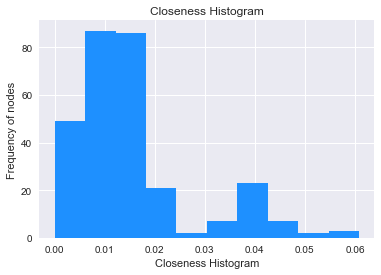

In [20]:
m.visualize_histogram(closeness, 'Closeness Histogram')

Given in input an author id and an integer d, the function $\texttt{graph}$\_$\texttt{distance}$ gets the subgraph induced by the nodes that have hop distance at most equal to d with the input author.

In [6]:
hop_graph=m.graph_distance(authors_graph, 256176, 2)

In the following subgraph the yellow node represents the source node (in this example Aris) and the other nodes are the authors at distance 2 from the given node. The subgraph includes 705 nodes and 2826 edges. The 

In [10]:
nx.info(hop_graph)

'Name: \nType: Graph\nNumber of nodes: 705\nNumber of edges: 2826\nAverage degree:   8.0170'

/Users/saraspadaccini/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/saraspadaccini/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/saraspadaccini/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/saraspadaccini/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 

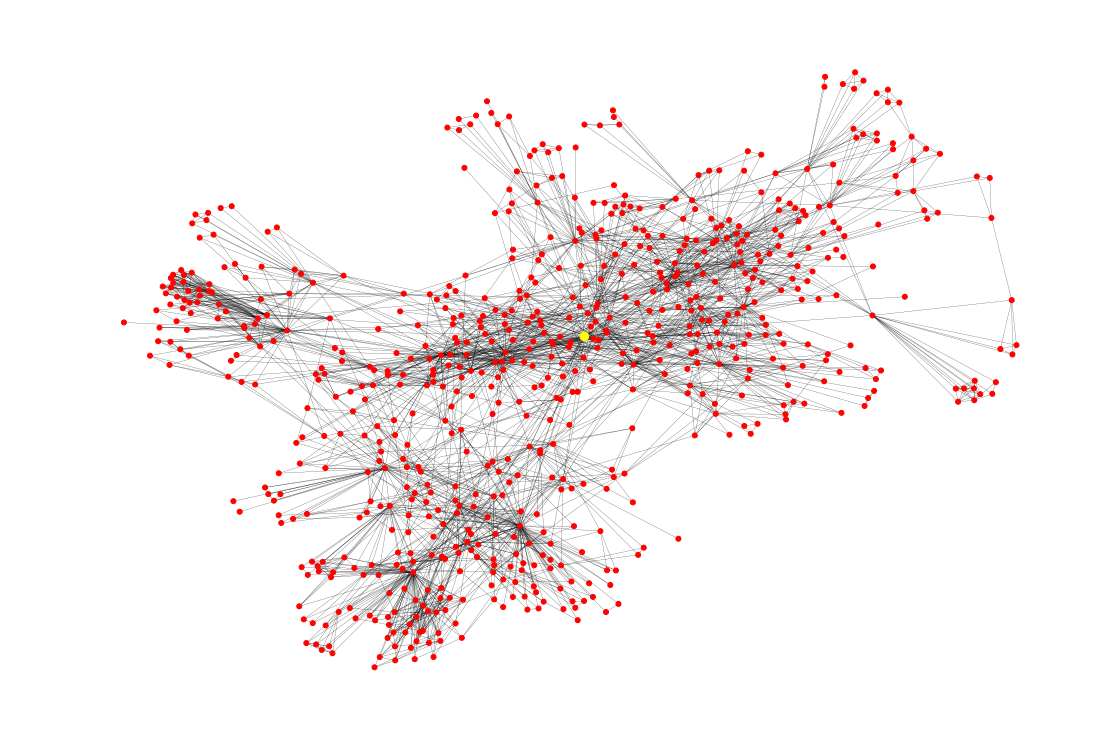

In [7]:
m.visualize_graph(hop_graph,node_labels=False, edge_labels=False, root_node = 256176)

# Problem 3

In [ ]:
#Question 3.a
ll=m.shortest_path(authors_graph, 256176, 317546) #Shortest distance between 256176 and 317546

In [ ]:
#Question 3.b
groups=m.group_number(authors_graph, [256176,317546]) 

In [21]:
groups # Comment about the output (key = v, value = tuple = (distance/shortest path, node))

NameError: name 'groups' is not defined